In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [2]:
import cv2 as cv

In [3]:
os.getcwd()

'/kaggle/working'

In [4]:
filepath='/kaggle/input/chest-xray-pneumonia'
os.listdir(filepath)

['chest_xray']

In [5]:
chest_xraypath=os.path.join(filepath,'chest_xray')

In [6]:
os.makedirs(chest_xraypath,exist_ok=True)

In [7]:
os.listdir(chest_xraypath)

['chest_xray', '__MACOSX', 'val', 'test', 'train']

In [8]:
Train_path= os.path.join(chest_xraypath,'train')
Test_path=os.path.join(chest_xraypath,'test')
Val_path=os.path.join(chest_xraypath,'val')


In [9]:
os.listdir(Train_path)

['PNEUMONIA', 'NORMAL']

In [10]:
X_train=[]
y_train=[]
X_test=[]
Y_test=[]
X_val=[]
Y_val=[]

# **DATA LOADING AND RESIZING**

In [11]:
labels=['PNEUMONIA', 'NORMAL']
pneumonia_trainlist=os.listdir(os.path.join(Train_path,'PNEUMONIA'))
normal_trainlist=os.listdir(os.path.join(Train_path,'NORMAL'))
for label in labels:
    if label == 'PNEUMONIA':
        for img_path in  pneumonia_trainlist:
            img= cv.imread(os.path.join(Train_path,'PNEUMONIA',img_path),cv.IMREAD_GRAYSCALE)
            if img is None:
                continue  # skip unreadable files like .DS_Store
            img=cv.resize(img,(225,225),interpolation=cv.INTER_CUBIC)
            X_train.append(img)
            y_train.append(1)
    elif label == 'NORMAL':
        for img_path in  normal_trainlist:
            img= cv.imread(os.path.join(Train_path,'NORMAL',img_path),cv.IMREAD_GRAYSCALE)
            if img is None:
                continue  # skip unreadable files like .DS_Store
            img=cv.resize(img,(225,225),interpolation=cv.INTER_CUBIC)
            X_train.append(img)
            y_train.append(0)


In [12]:
pneumonia_testlist=os.listdir(os.path.join(Test_path,'PNEUMONIA'))
normal_testlist=os.listdir(os.path.join(Test_path,'NORMAL'))
for label in labels:
    if label == 'PNEUMONIA':
        for img_path in  pneumonia_testlist:
            img= cv.imread(os.path.join(Test_path,'PNEUMONIA',img_path),cv.IMREAD_GRAYSCALE)
            if img is None:
                continue  # skip unreadable files like .DS_Store
            img=cv.resize(img,(225,225),interpolation=cv.INTER_CUBIC)
            X_test.append(img)
            Y_test.append(1)
    elif label == 'NORMAL':
        for img_path in  normal_testlist:
            img= cv.imread(os.path.join(Test_path,'NORMAL',img_path),cv.IMREAD_GRAYSCALE)
            if img is None:
                continue  # skip unreadable files like .DS_Store
            img=cv.resize(img,(225,225),interpolation=cv.INTER_CUBIC)
            X_test.append(img)
            Y_test.append(0)

In [13]:
pneumonia_Vallist=os.listdir(os.path.join(Val_path,'PNEUMONIA'))
normal_Vallist=os.listdir(os.path.join(Val_path,'NORMAL'))
for label in labels:
    if label == 'PNEUMONIA':
        for img_path in  pneumonia_Vallist:
            img= cv.imread(os.path.join(Val_path,'PNEUMONIA',img_path),cv.IMREAD_GRAYSCALE)
            if img is None:
                continue  # skip unreadable files like .DS_Store
            img=cv.resize(img,(225,225),interpolation=cv.INTER_CUBIC)
            X_val.append(img)
            Y_val.append(1)
    elif label == 'NORMAL':
        for img_path in  normal_Vallist:
            img= cv.imread(os.path.join(Val_path,'NORMAL',img_path),cv.IMREAD_GRAYSCALE)
            if img is None:
                continue  # skip unreadable files like .DS_Store
            img=cv.resize(img,(225,225),interpolation=cv.INTER_CUBIC)
            X_val.append(img)
            Y_val.append(0)

# **Data Augmentations**

In [16]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv.warpAffine(image, M, (w, h))
    return rotated

def random_crop(image, crop_height, crop_width):
    h, w = image.shape[:2]
    if h < crop_height or w < crop_width:
        raise ValueError("Crop dimensions exceed image size")
    y = np.random.randint(0, h - crop_height)
    x = np.random.randint(0, w - crop_width)
    return image[y:y+crop_height, x:x+crop_width]

def gamma_correction(image, gamma):
    image = np.clip(image, 0, 255).astype(np.float32) / 255.0
    corrected = np.power(image, gamma)
    return np.uint8(np.clip(corrected * 255.0, 0, 255))

    
def Flip_function(img,flipCode):
    return cv.flip(img, flipCode)




In [17]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([1341, 3875]))

In [18]:
def random_augment(X_train, y_train, num_augmentations=100, seed=42):

    if seed is not None:
        np.random.seed(seed)

    y_train_new = np.array(y_train.copy())
    label_0_indices = np.where(y_train_new == 0)[0]

    
    # Define augmentation functions with their parameter ranges
    augmentations = {
        'rotate_image': {
            'func': lambda img: rotate_image(img, angle=np.random.uniform(-30, 30)),
        },
        'gamma_correction': {
            'func': lambda img: gamma_correction(img, gamma=np.random.uniform(0.5, 2.0)),
        },
       
        'Flip': {
            'func': lambda img: Flip_function(img, flipCode=np.random.choice([-1,1,0])),
        }
    }
    
    for _ in range(num_augmentations):
        # Randomly select an image and its label
        img_index = np.random.choice(label_0_indices)
        img = X_train[img_index].copy()
        label = y_train[img_index]
        
        # Randomly select an augmentation function
        aug_name = np.random.choice(list(augmentations.keys()))
        aug_func = augmentations[aug_name]['func']
        
        # Apply the augmentation
        augmented_img = aug_func(img)
        
        X_train.append(augmented_img)
        y_train.append(label)


random_augment(X_train, y_train,num_augmentations=1000,seed=42)

In [19]:
X_train=np.array(X_train)
print(X_train.shape)
y_train=np.array(y_train)
np.unique(y_train)
X_test=np.array(X_test)
print(X_test.shape)
X_val=np.array(X_val)
print(X_val.shape)
Y_test=np.array(Y_test)
Y_val=np.array(Y_val)

(6216, 225, 225)
(624, 225, 225)
(16, 225, 225)


In [20]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([2341, 3875]))

In [21]:
X_train = X_train.reshape(-1, 225, 225, 1)
X_val = X_val.reshape(-1, 225, 225, 1)
X_test= X_test.reshape(-1, 225, 225, 1)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test=X_test.astype('float32')

y_train = y_train.astype('float32')
Y_val = Y_val.astype('float32')
Y_test =Y_test.astype('float32')

In [22]:
X_train.shape

(6216, 225, 225, 1)

**DATA NORMALIZATION**

In [23]:
X_train= X_train /255.0

mean=np.mean(X_train,axis=(0,1,2))
std=np.std(X_train,axis=(0,1,2))
X_train= (X_train - mean)/std

In [24]:
X_test= X_test/255.0
X_test= (X_test - mean) / std

In [25]:
X_val=X_val/255.0
X_val=(X_val - mean) / std

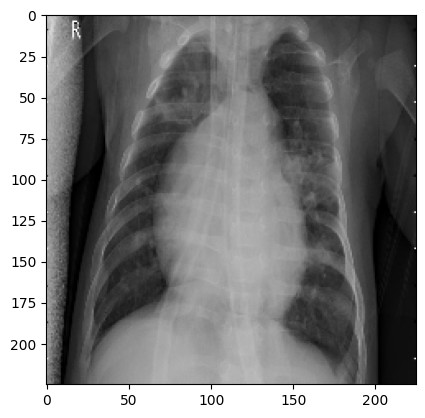

In [32]:
import matplotlib.pyplot as plt 
sample_image = X_train[100]  
plt.imshow(sample_image,cmap='gray')

# **BASELINE CNN**

In [30]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

2025-05-07 01:58:18.224590: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746583098.561855      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746583098.638403      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [33]:
base_model=models.Sequential()
base_model.add(Input(shape=(225,225,1)))
base_model.add(Conv2D(16,(3,3),activation='relu'))
base_model.add(Conv2D(64,(3,3),activation='relu'))
base_model.add(MaxPooling2D(pool_size=(2,2)))
base_model.add(BatchNormalization())
base_model.add(Conv2D(128,(3,3),activation='relu',kernel_regularizer=regularizers.l2(0.001)))
base_model.add(Conv2D(128,(3,3),activation='relu',kernel_regularizer=regularizers.l2(0.001)))
base_model.add(BatchNormalization())
base_model.add(MaxPooling2D(pool_size=(2,2)))
base_model.add(Conv2D(128,(7,7),activation='relu',kernel_regularizer=regularizers.l2(0.001)))
base_model.add(Dropout(0.3))
base_model.add(Conv2D(128,(7,7),activation='relu',kernel_regularizer=regularizers.l2(0.001)))
base_model.add(Dropout(0.3))
base_model.add(BatchNormalization())
base_model.add(MaxPooling2D(pool_size=(2,2)))
base_model.add(Conv2D(256,(1,1),activation='tanh'))
base_model.add(Flatten())
base_model.add(BatchNormalization())
base_model.add(Dense(1026,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
base_model.add(Dropout(0.5))
base_model.add(Dense(1,activation='sigmoid'))

I0000 00:00:1746583170.071605      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746583170.072387      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [34]:
optimizer = Adam(learning_rate=0.01) 

base_model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [35]:
def scheduler(epoch, lr):
    if (epoch + 1) % 10 == 0: 
        return lr * 0.99       
    else:
        return lr  

In [36]:
lr_callback = LearningRateScheduler(scheduler)

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath='best_model2.weights.h5',   
    monitor='val_loss',                 
    save_best_only=True,                
    save_weights_only=True,            
    verbose=1
)


In [38]:
history=base_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, Y_val),
    callbacks=[lr_callback,checkpoint]
)
history

Epoch 1/30


I0000 00:00:1746583235.121833     107 service.cc:148] XLA service 0x785d740074e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746583235.122898     107 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746583235.122925     107 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746583235.810086     107 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1746583259.626668     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.7583 - loss: 271.1827
Epoch 1: val_loss improved from inf to 183.20918, saving model to best_model2.weights.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 346ms/step - accuracy: 0.7586 - loss: 270.8575 - val_accuracy: 0.5000 - val_loss: 183.2092 - learning_rate: 0.0100
Epoch 2/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.8898 - loss: 19.6835
Epoch 2: val_loss improved from 183.20918 to 6.45398, saving model to best_model2.weights.h5
195/195 ━━━━━━━━━━━━━━━━━━━━ 57s 293ms/step - accuracy: 0.8897 - loss: 19.6487 - val_accuracy: 0.8125 - val_loss: 6.4540 - learning_rate: 0.0100
Epoch 3/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.8826 - loss: 6.0125
Epoch 3: val_loss did not improve from 6.45398
195/195 ━━━━━━━━━━━━━━━━━━━━ 52s 267ms/step - accuracy: 0.8827 - loss: 6.0104 - val_accuracy: 0.4375 - val_loss: 6.5638 - learning_rate: 0.0100
Epoch 4/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.8855 - los

In [39]:
base_model.load_weights('best_model2.weights.h5')

In [40]:
base_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 223, 223, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 221, 221, 64)        │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 110, 110, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 106, 106, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 47, 47, 128)         │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 47, 47, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 41, 41, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 41, 41, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 256)         │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 102400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 102400)              │         409,600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1026)                │     105,063,426 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1026)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 321,624,497 (1.20 GB)

 Trainable params: 107,139,685 (408.71 MB)

 Non-trainable params: 205,440 (802.50 KB)

 Optimizer params: 214,279,372 (817.41 MB)

In [41]:
loss, accuracy = base_model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9244 - loss: 0.6034
Test Loss: 0.9620936512947083
Test Accuracy: 0.8012820482254028


In [42]:
y_pred = base_model.predict(X_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step


In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
y_pred_class = (y_pred > 0.6).astype("int32")

In [49]:
print(classification_report(Y_test, y_pred_class, target_names=['Normal','Pneonomina']))

              precision    recall  f1-score   support

      Normal       0.92      0.54      0.68       234
  Pneonomina       0.78      0.97      0.87       390

    accuracy                           0.81       624
   macro avg       0.85      0.76      0.77       624
weighted avg       0.83      0.81      0.80       624



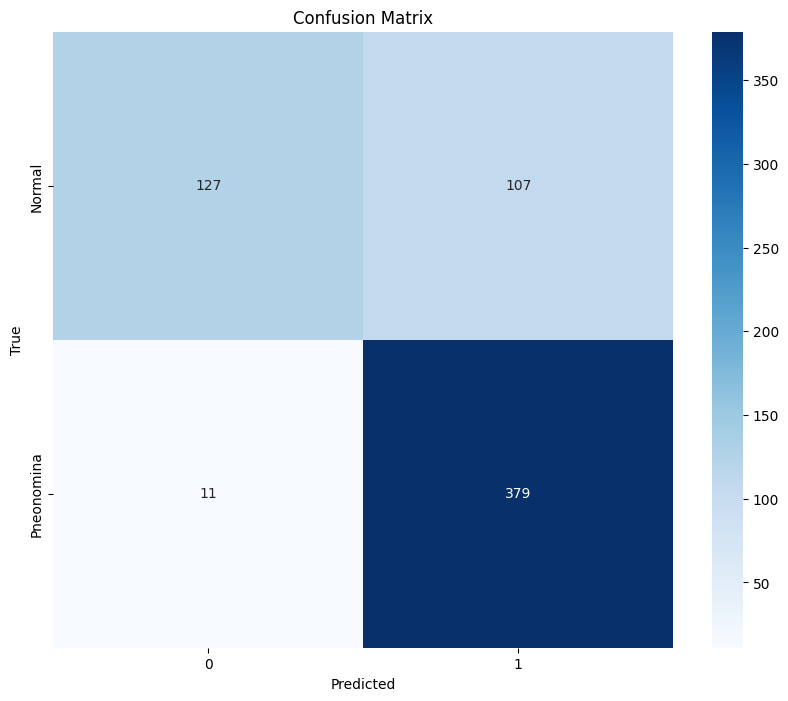

In [50]:
cm = confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', yticklabels=['Normal','Pneonomina'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Confusion Matrix**

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(Y_test, y_pred_class)
precision = precision_score(Y_test, y_pred_class)
recall = recall_score(Y_test, y_pred_class)
f1 = f1_score(Y_test, y_pred_class)
roc_auc = roc_auc_score(Y_test, y_pred)  # Uses probabilities, not classes

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")  
print(f"Recall (Sensitivity): {recall:.4f}")  
print(f"F1-Score: {f1:.4f}") 
print(f"ROC-AUC: {roc_auc:.4f}")  

Accuracy: 0.8109
Precision: 0.7798
Recall (Sensitivity): 0.9718
F1-Score: 0.8653
ROC-AUC: 0.9171


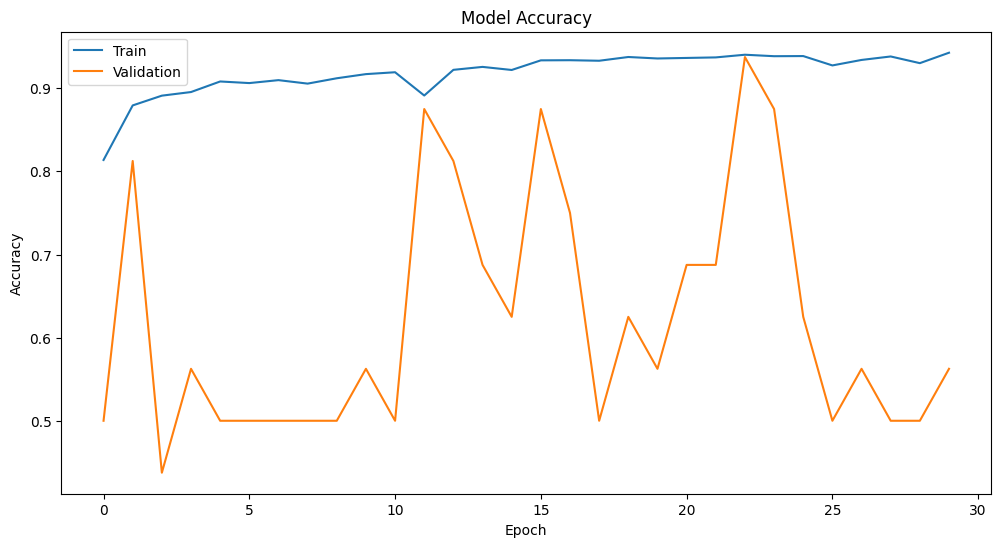

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

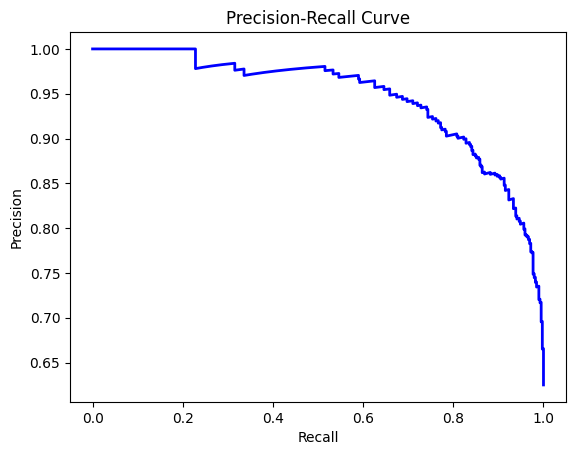

In [54]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(Y_test, y_pred)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

**Feature Map of the last layer**

In [55]:
from tensorflow.keras.models import Model

last_conv_layer_name = 'conv2d_6'  
submodel = Model(inputs=base_model.inputs, outputs=base_model.get_layer(last_conv_layer_name).output)

In [56]:
sample_image = X_train[0]  
sample_image = np.expand_dims(sample_image, axis=0)

# Get feature maps
feature_maps = submodel.predict(sample_image) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


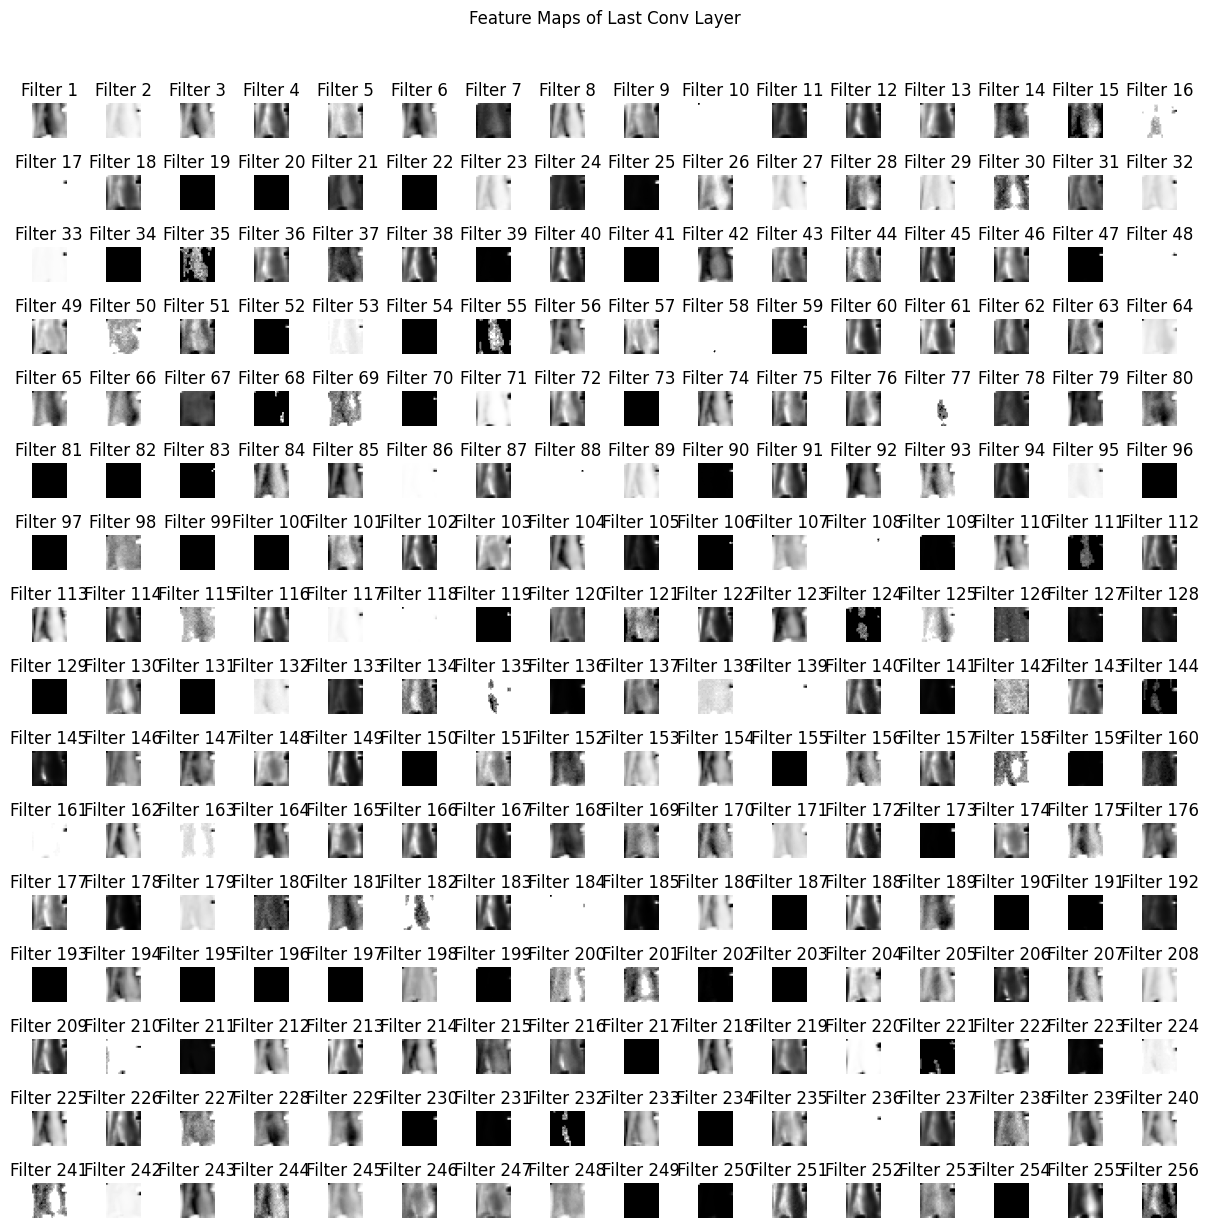

In [57]:
# Squeeze batch dimension
feature_maps = feature_maps[0]  # Shape: (H, W, num_filters)
num_filters = feature_maps.shape[-1]

# Plot settings
rows = int(np.ceil(np.sqrt(num_filters)))
cols = int(np.ceil(num_filters / rows))

plt.figure(figsize=(12, 12))
for i in range(num_filters):
    plt.subplot(rows, cols, i+1)
    plt.imshow(feature_maps[:, :, i], cmap='gray') 
    plt.axis('off')
    plt.title(f'Filter {i+1}')

plt.suptitle('Feature Maps of Last Conv Layer', y=1.02)
plt.tight_layout()
plt.show()

# **VGG16**

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 19,402,241 (74.01 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 162s 778ms/step - accuracy: 0.8500 - loss: 0.3327 - val_accuracy: 0.7500 - val_loss: 0.8374
Epoch 2/10


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.8374
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 551ms/step - accuracy: 0.9411 - loss: 0.1529 - val_accuracy: 0.8750 - val_loss: 0.2899
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.2899
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 548ms/step - accuracy: 0.9629 - loss: 0.1053 - val_accuracy: 0.8750 - val_loss: 0.2833
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.2833
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 551ms/step - accuracy: 0.9673 - loss: 0.0906 - val_accuracy: 0.8750 - val_loss: 0.2149
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.2149
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 92s 541ms/step - accuracy: 0.9735 

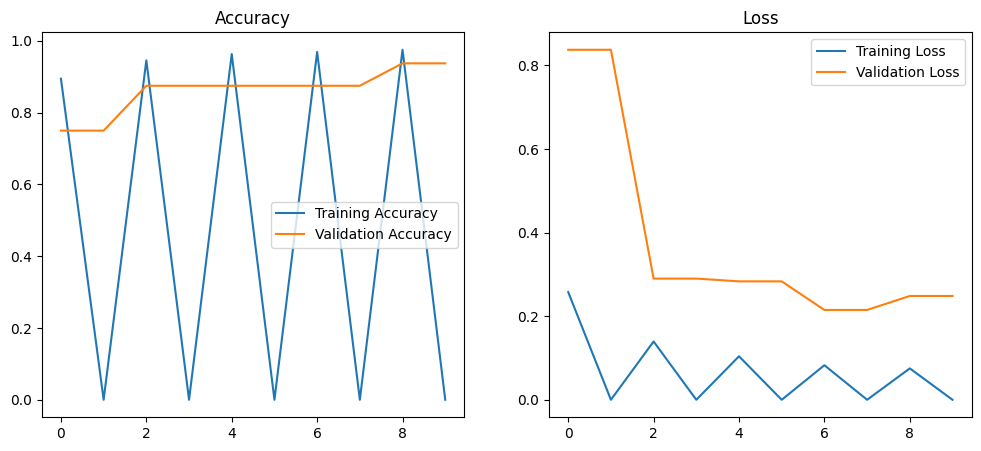

In [60]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Load the VGG16 model (pre-trained on ImageNet)
vgg16_model = VGG16(weights='imagenet', 
                   include_top=False,  # Remove the original dense layers
                   input_shape=(224, 224, 3))  # Default input size for VGG16

# 2. Freeze all layers in the base model
for layer in vgg16_model.layers:
    layer.trainable = False

for layer in vgg16_model.layers[-8:]:
    layer.trainable = True
# 3. Add custom dense layers on top
x = Flatten()(vgg16_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Regularization
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification (adjust for multi-class)

# 4. Create the final model
model = Model(inputs=vgg16_model.input, outputs=predictions)

# 5. Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])

# Print model summary
model.summary()

# 6. Prepare data using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    Train_path,  # Replace with your path
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb')

validation_generator = test_datagen.flow_from_directory(
    Val_path,  # Replace with your path
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

# 7. Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

# 8. Save the model
model.save('vgg16_transfer_learning.h5')

# 9. Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [65]:
test_gen = test_datagen.flow_from_directory(
    Test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

loss, accuracy = model.evaluate(
    test_gen,
    steps=len(test_gen)          
)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 354ms/step - accuracy: 0.8852 - loss: 0.3047
Test Loss: 0.1996, Test Accuracy: 0.9247


In [66]:
y_pred_vgg16 = model.predict(test_gen,steps=len(test_gen))

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 282ms/step


In [73]:
y_pred_class_vgg16 = (y_pred_vgg16.ravel() > 0.5).astype('int32')


In [69]:
print(classification_report(test_gen.classes, y_pred_class_vgg16, target_names=['Normal','Pneonomina']))

              precision    recall  f1-score   support

      Normal       0.95      0.85      0.90       234
  Pneonomina       0.92      0.97      0.94       390

    accuracy                           0.93       624
   macro avg       0.93      0.91      0.92       624
weighted avg       0.93      0.93      0.93       624



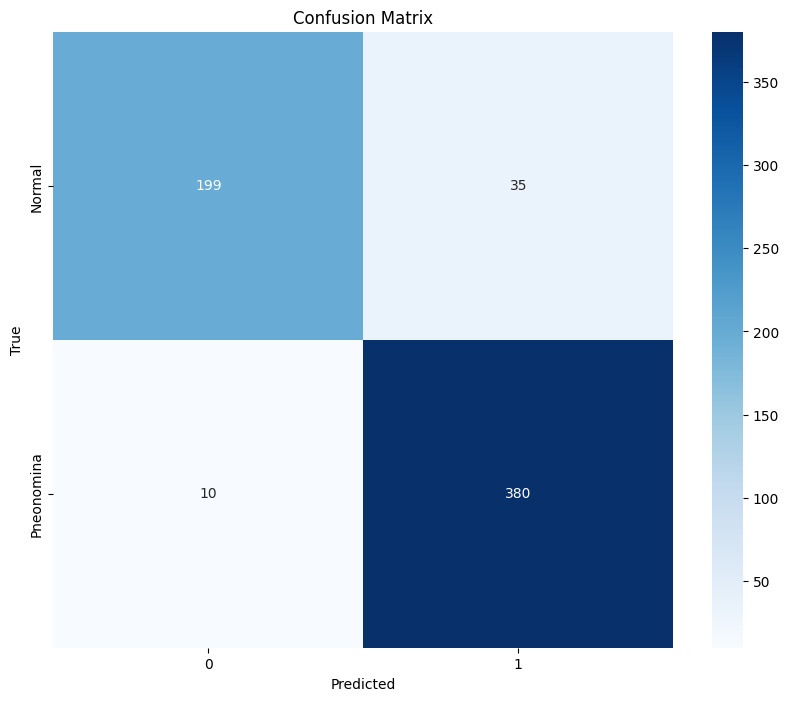

In [70]:
cm = confusion_matrix(test_gen.classes, y_pred_class_vgg16)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', yticklabels=['Normal','Pneonomina'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()